# Analyzing Results from 106 Editions of the Tour de France
*Alex Dolwick* <br>
*BIOS 512* <br>
*December 8th, 2021*

The Tour de France (TDF) is considered the most prestigious cycling race in the world. Competitors ride for thousands of kilometers over the course of 21 days, and the cyclist with the fastest total time wins. Using [Alistair Rushworth's tdf package](https://github.com/alastairrushworth/tdf) accessed from the [TidyTuesday data project](https://github.com/rfordatascience/tidytuesday/tree/master/data/2020/2020-04-07), I analyzed TDF race results from 1903 to 2021. I was interested in learning **which countries have had the most TDF winners**, **how the speed of TDF winners has changed over time**, and **what may impact TDF winners' margins of victory**. I read in the dataset and added results from the two most recent editions of the race. I managed the data, which involved fixing errors, adding new columns, and removing [Lance Armstrong's seven revoked victories](https://www.history.com/this-day-in-history/cyclist-lance-armstrong-is-stripped-of-his-seven-tour-de-france-titles). I then created four visualizations to address my topics of interest.

## Reading in Data

In [1]:
library('ggrepel')
library('tidyverse')

Loading required package: ggplot2

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
tdf <- read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-04-07/tdf_winners.csv')


── Column specification ────────────────────────────────────────────────────────
cols(
  edition = col_double(),
  start_date = col_date(format = ""),
  winner_name = col_character(),
  winner_team = col_character(),
  distance = col_double(),
  time_overall = col_double(),
  time_margin = col_double(),
  stage_wins = col_double(),
  stages_led = col_double(),
  height = col_double(),
  weight = col_double(),
  age = col_double(),
  born = col_date(format = ""),
  died = col_date(format = ""),
  full_name = col_character(),
  nickname = col_character(),
  birth_town = col_character(),
  birth_country = col_character(),
  nationality = col_character()
)




In [3]:
#tdf %>% tail(3)

## Data Management

#### Adding Data from 2020 and 2021

In [4]:
new <- tibble(
    edition = c(107,108),
    start_date = c("2020-08-29","2021-06-26"),
    winner_name = c("Tadej Pogacar","Tadej Pogacar"),
    winner_team = c("UAE Team Emirates","UAE Team Emirates"),
    distance = c(3484,3414),
    time_overall = c(87.33694,82.94333),
    time_margin = c(.01638889,.08888889),
    stage_wins = c(3,3),
    stages_led = c(2,14),
    height = c(1.76,1.76),
    weight = c(66,66),
    age = c(21,22),
    born = c("1998-09-21","1998-09-21"),
    died = c(NA,NA),
    full_name = c("Tadej Pogacar","Tadej Pogacar"),
    nickname = c("Pogi","Pogi"),
    birth_town = c("Komenda","Komenda"),
    birth_country = c("Slovenia","Slovenia"),
    nationality = c("Slovenia","Slovenia")
)
#new

#### Joining 2020-2021 Data with the Initial Dataset

In [5]:
tdf2021 <- rbind(tdf,new) %>% 
    mutate(speed = distance/time_overall)
#tdf2021 %>% tail(5)

#### Removing Extra Spaces from the Nationality Column

In [6]:
#tdf2021 %>% filter(nationality=="Luxembourg")

In [7]:
tdf2021$nationality <- str_squish(tdf2021$nationality)

In [8]:
#tdf2021 %>% filter(nationality=="Luxembourg")

## Data Visualization

The four data visualizations for this project address the following four questions: <br>
<br>
*1. Which countries have had the most TDF winners?* <br>
*2. How has the speed of TDF winners changed over time?* <br>
*3. What effect does race distance have on the speed of winners?* <br>
*4. Does a faster speed ensure a wider margin of victory?* <br>
<br>
The answers to these questions will be revealed in the visualizations and discussed in the conclusions paragraph.

#### Viewing Countries with the Most TDF Winners

In [9]:
countries = tdf2021 %>%
    group_by(nationality) %>%
    summarize(n_wins = n()) %>%
    ungroup() %>%
    arrange(-n_wins)
#countries %>% head(10)

#### Removing Lance Armstrong's Revoked Wins and Mutating New Columns

In [10]:
tdf2 = tdf2021 %>%
    filter(winner_name != "Lance Armstrong") %>%
    mutate(nationality_lumped = nationality %>% 
           fct_lump(n = 7) %>% 
           fct_infreq() %>% 
           fct_relevel('Other', after= Inf) %>%
           fct_rev()
    ) %>%
    mutate(era = ifelse(edition <= 33, "Pre-WWII", "Post-WWII"))
#tdf2 %>% tail(4)

## Visualization #1: The Nationalities of TDF Winners

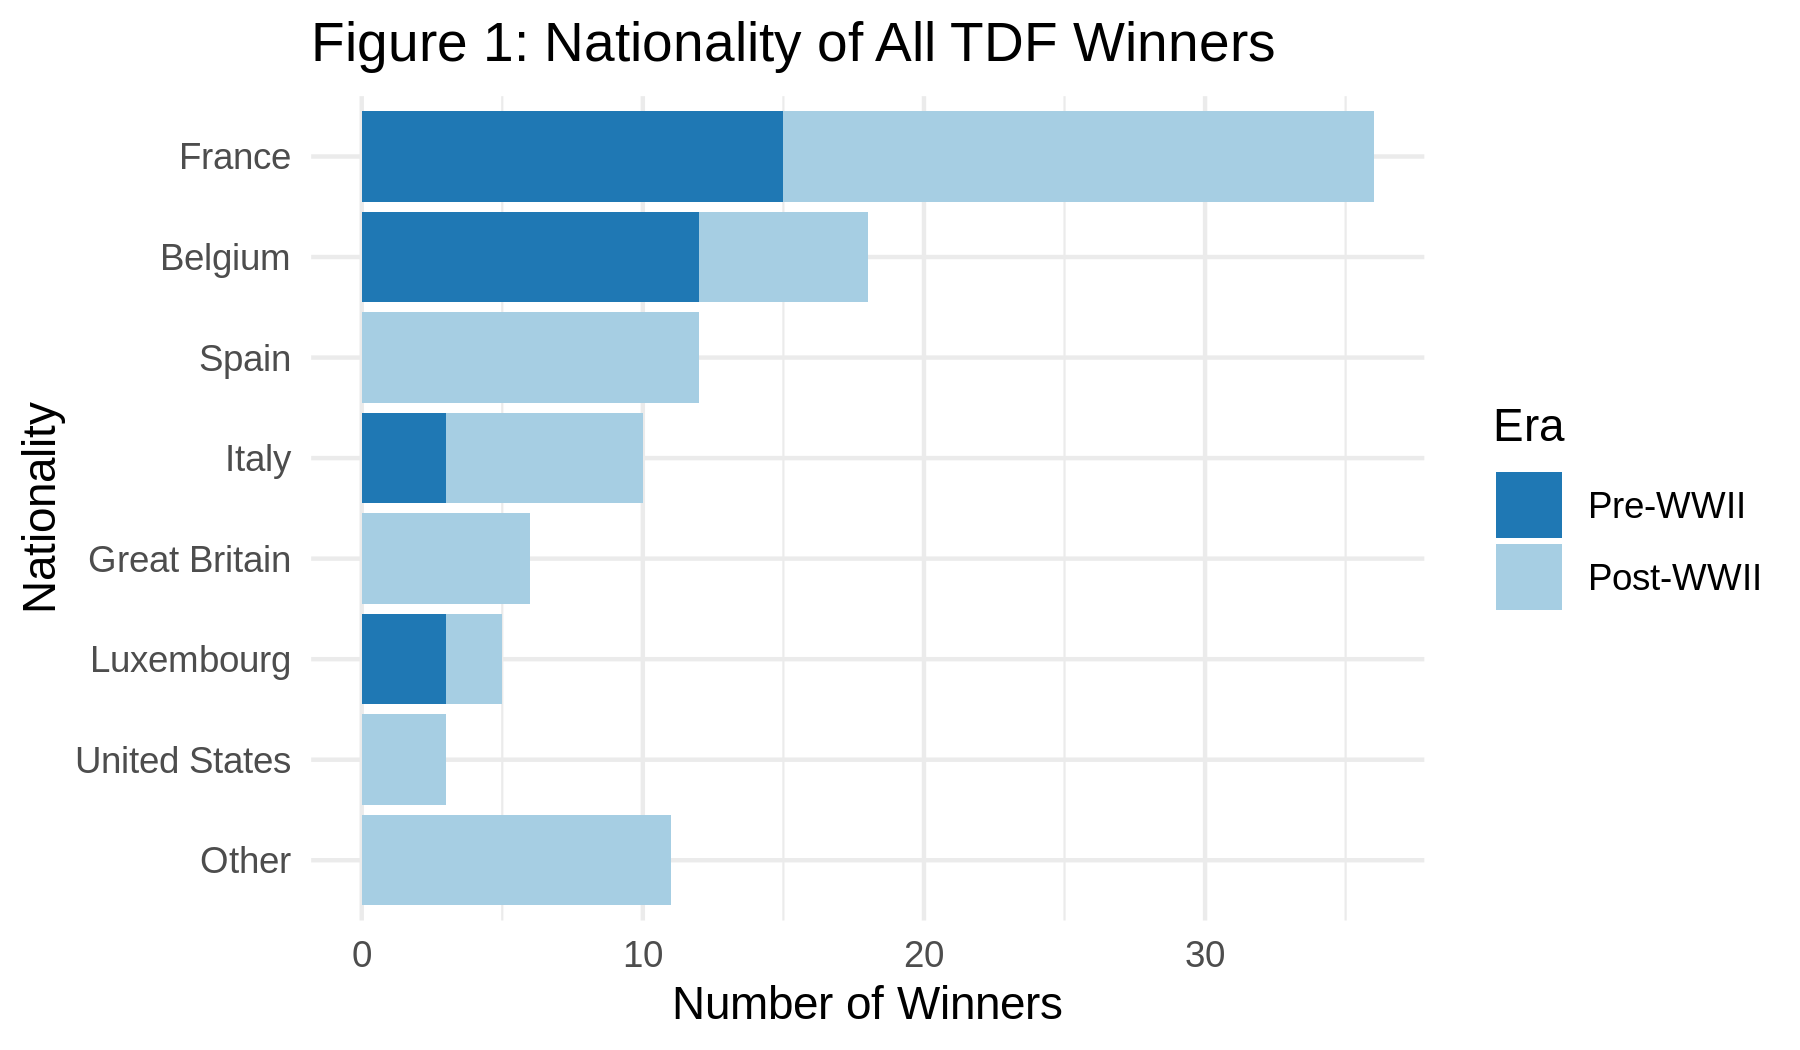

In [11]:
options(repr.plot.width=6, repr.plot.height=3.5)
p1 = ggplot(tdf2, aes(y=nationality_lumped, fill=era)) +
    geom_bar() +
    scale_fill_brewer(palette="Paired",
                      guide = guide_legend(reverse = TRUE)) +
    theme_minimal() +
    labs(title="Figure 1: Nationality of All TDF Winners",
         x="Number of Winners",
         y="Nationality",
         fill="Era")
p1

#### Viewing Ten Fastest TDF Winners

In [12]:
# tdf2 %>%
#     arrange(-speed) %>%
#     head(10)

#### Creating a Tibble with Lance Armstrong's Revoked Wins

In [13]:
lance = tdf2021 %>% 
    filter(winner_name == "Lance Armstrong")

# lance %>%
#     arrange(-speed) %>%
#     head(1)

## Visualization #2: The Speed of TDF Winners Increases over Time

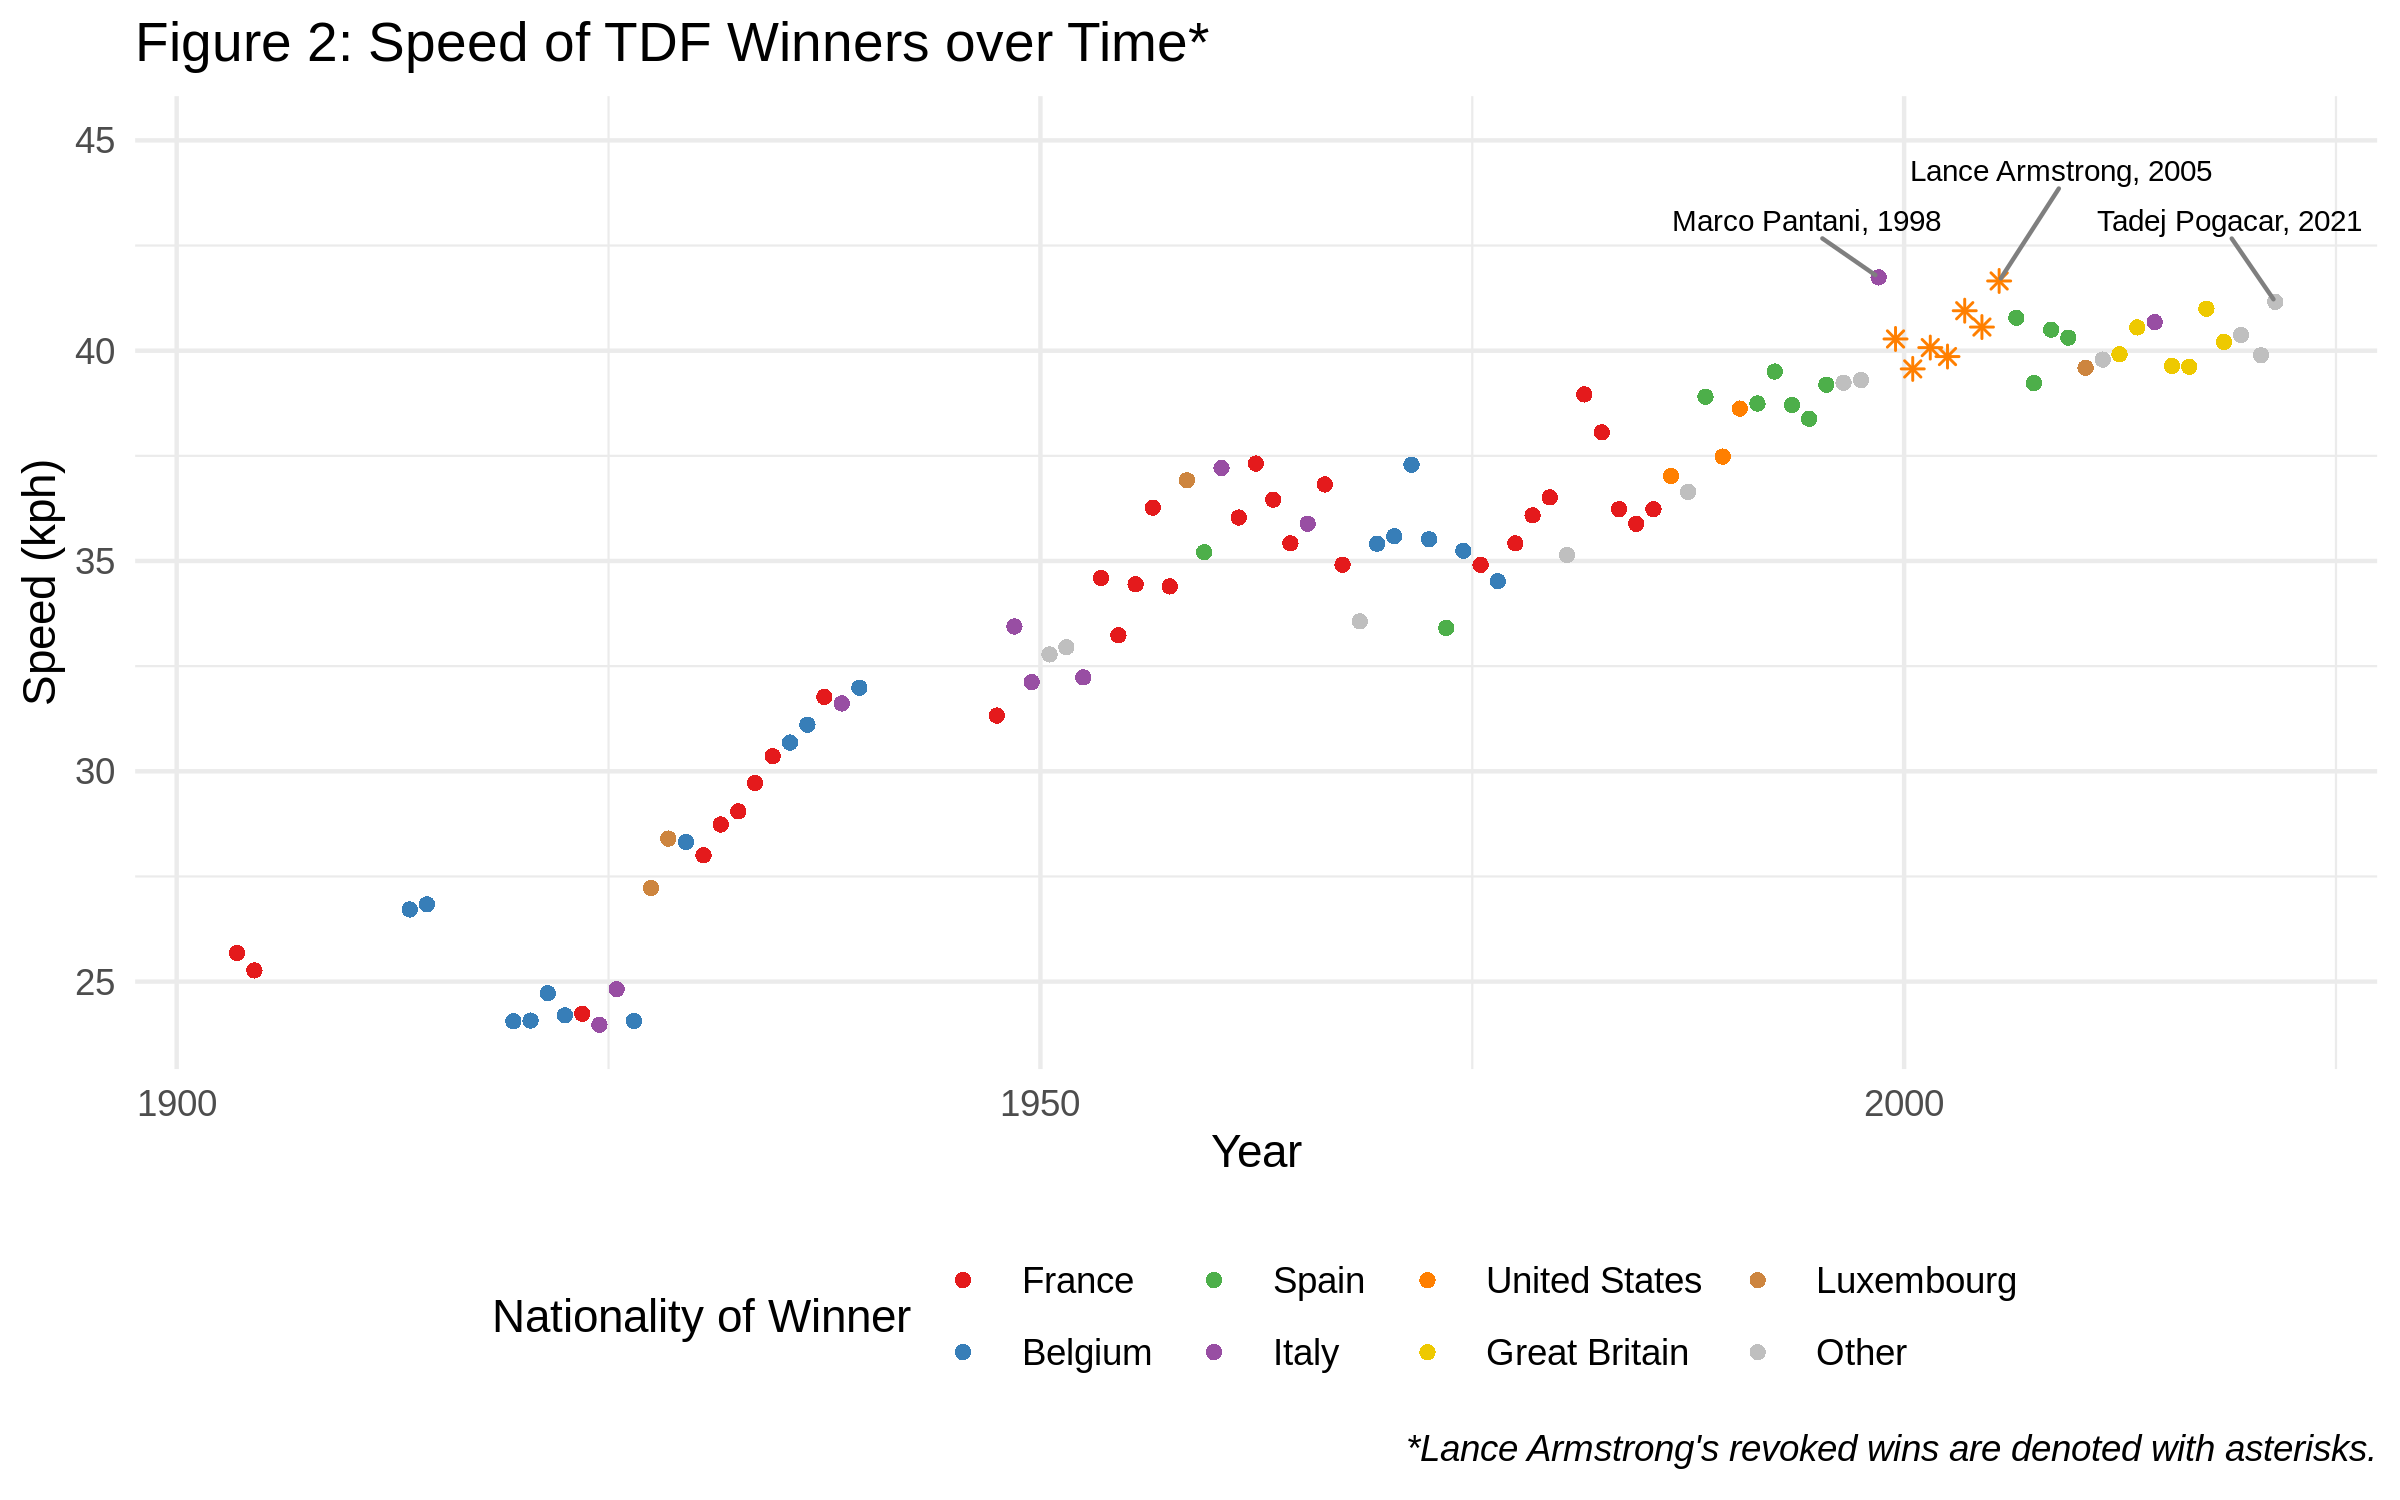

In [14]:
nat = c("France" = "#e41a1c","Belgium" = "#377eb8","Spain" = "#4daf4a","Italy" = "#984ea3",
        "United States" = "#ff7f00","Great Britain" = "gold2","Luxembourg" = "peru","Other" = "gray75")

options(repr.plot.width=8, repr.plot.height=5)

p2 = ggplot() +
    geom_point(data=lance,
               mapping=aes(x=start_date,
                           y=speed,
                           color=nationality),
               shape=8,
               size=1.5) +
    geom_point(data=tdf2, 
               mapping=aes(x=start_date, 
                           y=speed, 
                           color=nationality_lumped), 
               shape=16,
               size=1.5,
               na.rm = TRUE) +
    theme_minimal() +
    theme(legend.position = "bottom") +
    scale_color_manual(values = nat,
                       guide = guide_legend(override.aes = list(shape = 16))) +
    labs(y="Speed (kph)",
         x="Year",
         color="Nationality of Winner",
         title="Figure 2: Speed of TDF Winners over Time*",
         caption=expression(paste(italic("*Lance Armstrong's revoked wins are denoted with asterisks.")))) +
    coord_cartesian(ylim = c(min(tdf2$speed),45)) +
    geom_text_repel(
            data = tdf2021 %>% 
                        filter(edition %in% c(85,92,108)),
            nudge_y = 2,
            segment.size = 0.5,
            size = 2.5,
            segment.color = "grey50",
            aes(x=start_date, 
                y=speed, 
                label = paste(winner_name,", ",substr(start_date, start=1, stop=4),
                              sep="")),
        )
p2

## Visualization #3: Race Distance May Confound the Relationship between Speed and Year

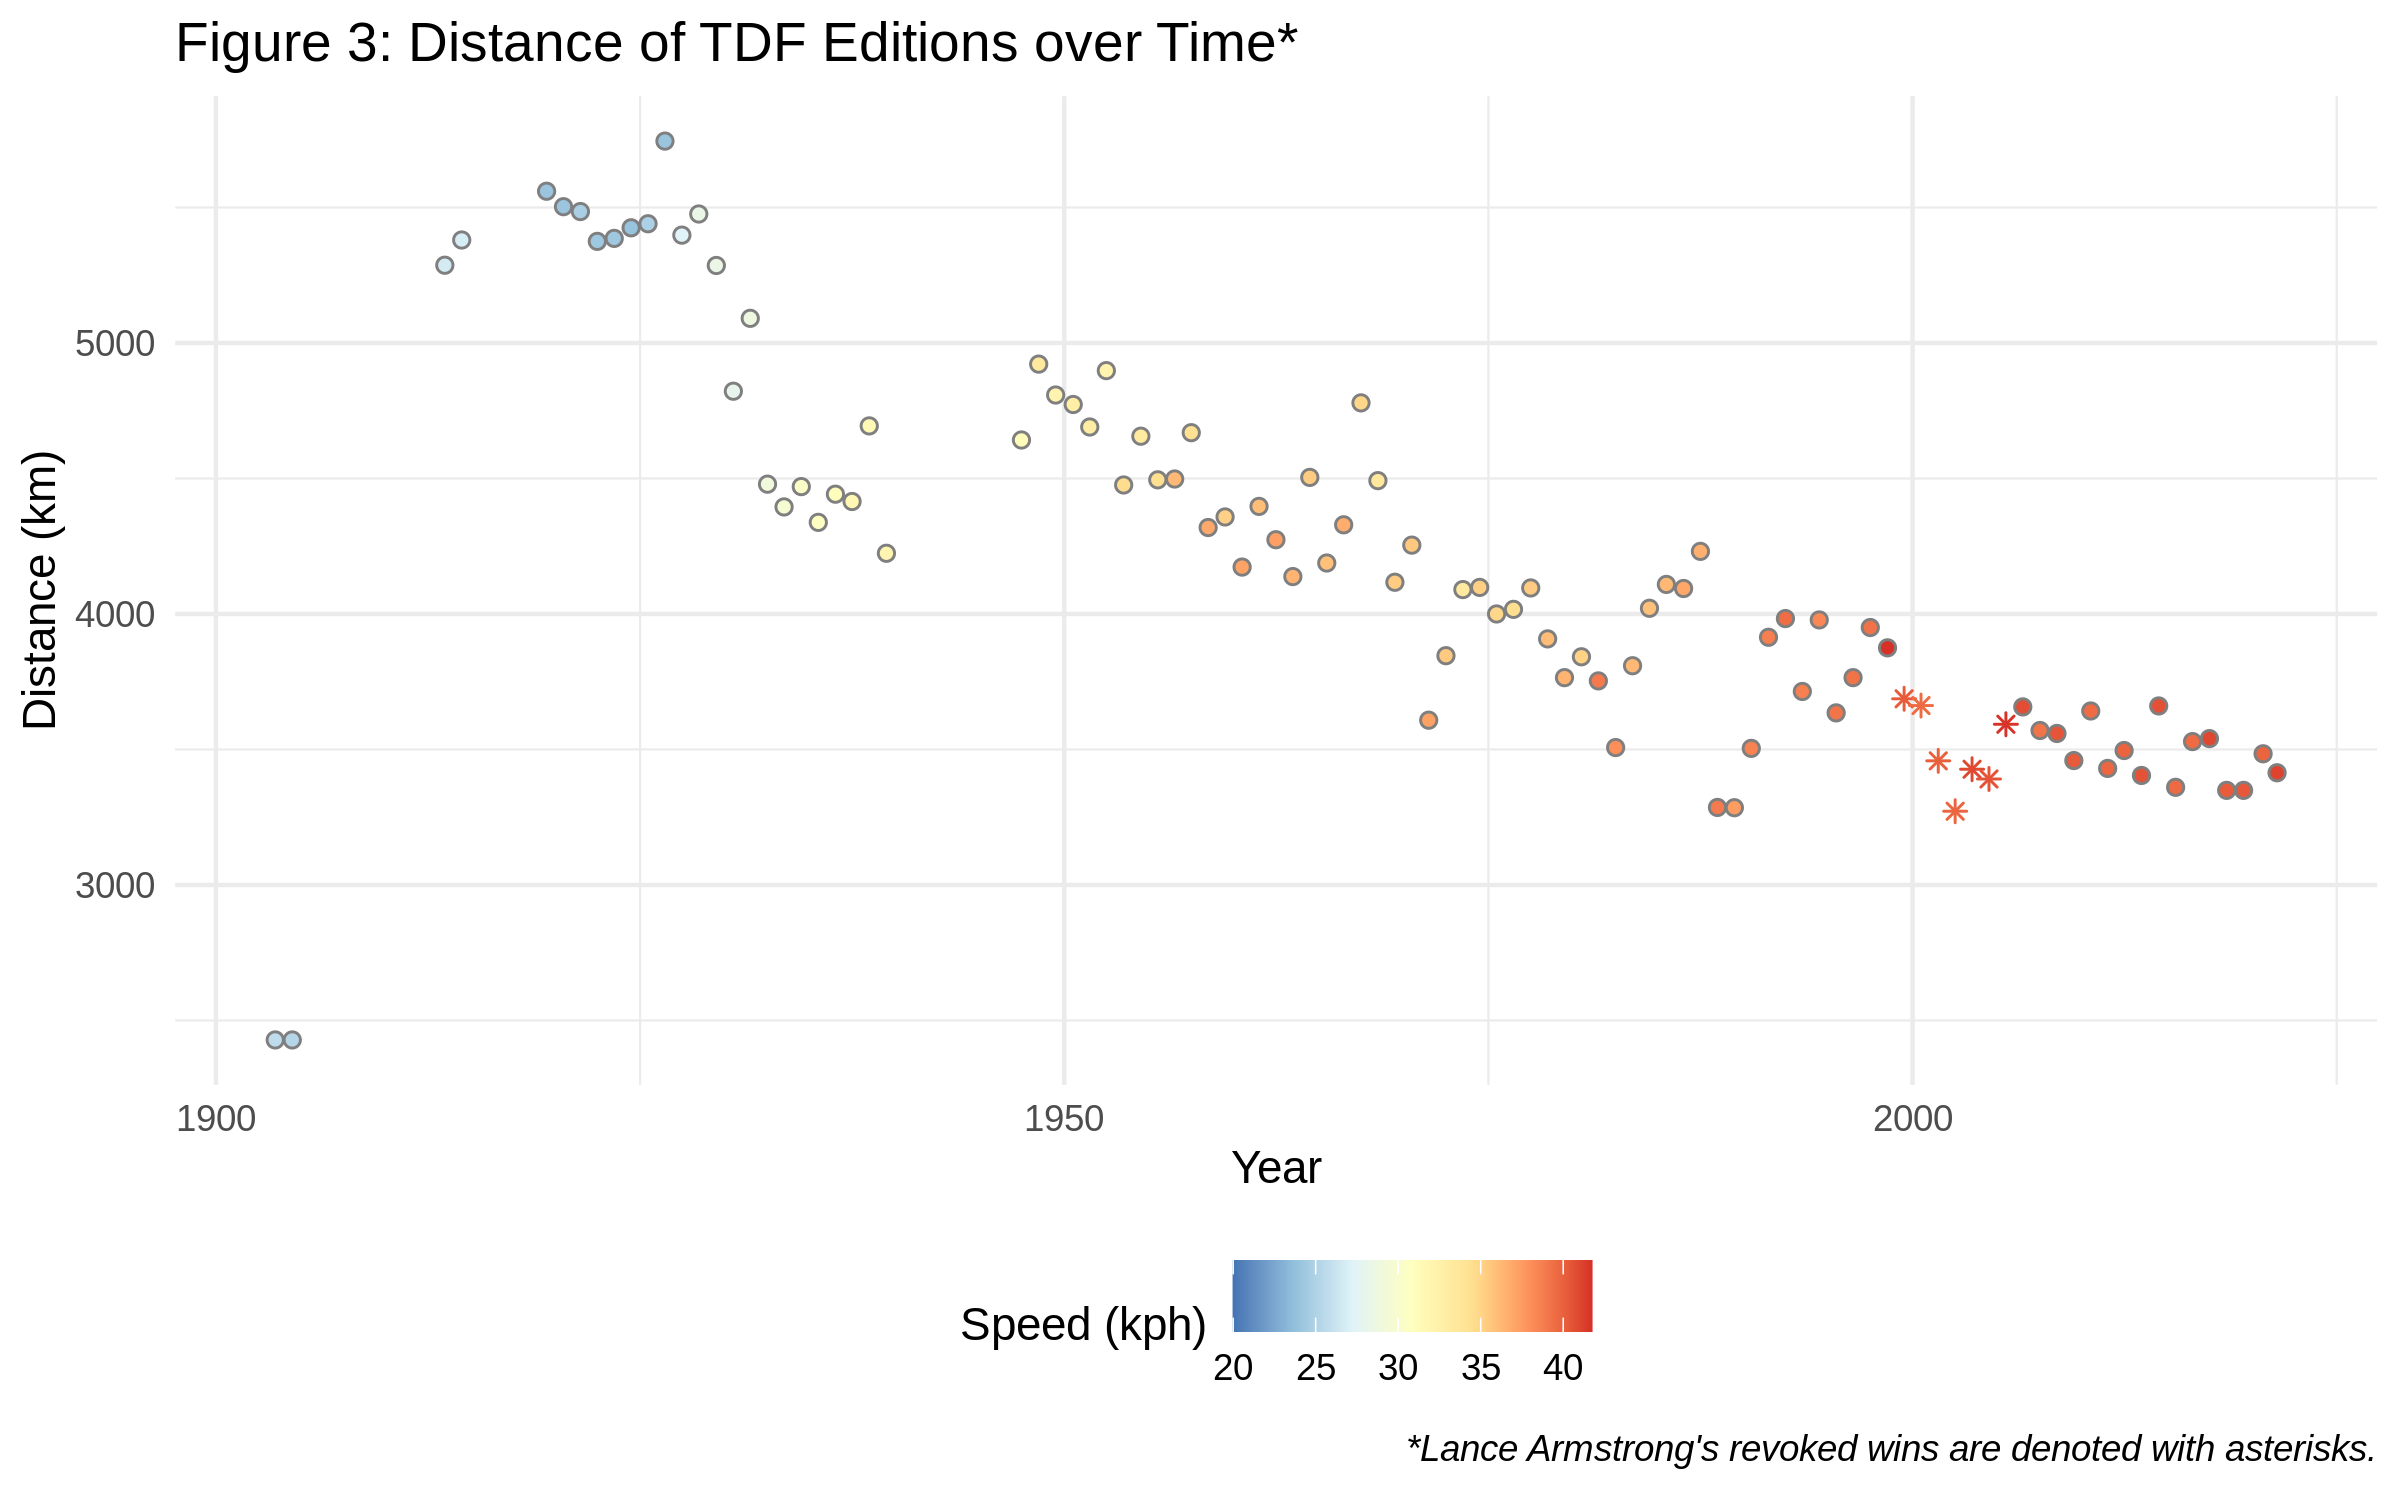

In [15]:
options(repr.plot.height=5)

p3 = ggplot() +
    geom_point(data=lance,
               mapping=aes(x=start_date,
                           y=distance,
                           color=speed),
               shape=8,
               size=1.5) +
    geom_point(data=tdf2 %>% filter(!is.na(speed)), 
               mapping=aes(x=start_date, 
                           y=distance, 
                           color=speed), 
               shape=16,
               size=1.5,
               na.rm = TRUE) +
    geom_point(data=tdf2 %>% filter(!is.na(speed)), 
               aes(x=start_date, y=distance),
               color="gray50",
               shape=1,
               size=1.5) +
    scale_color_distiller(palette="RdYlBu", direction=-1, limits=c(20,max(tdf2$speed))) +
    theme_minimal() +
    theme(legend.position = "bottom") +
    labs(title="Figure 3: Distance of TDF Editions over Time*",
         x="Year",
         y="Distance (km)",
         color="Speed (kph)",
         caption=expression(paste(italic("*Lance Armstrong's revoked wins are denoted with asterisks."))))

p3

#### Creating Two New Columns for Visualization #4

In [16]:
tdf3 <- tdf2 %>%
    mutate(time_margin_minutes = time_margin*60) %>%
    mutate(decade = paste(substr(start_date, start=1, stop=3),"0s",sep=""))

#tdf3 %>% tail(4)

## Visualization #4: Does Riding Faster Ensure a Wider Margin of Victory?

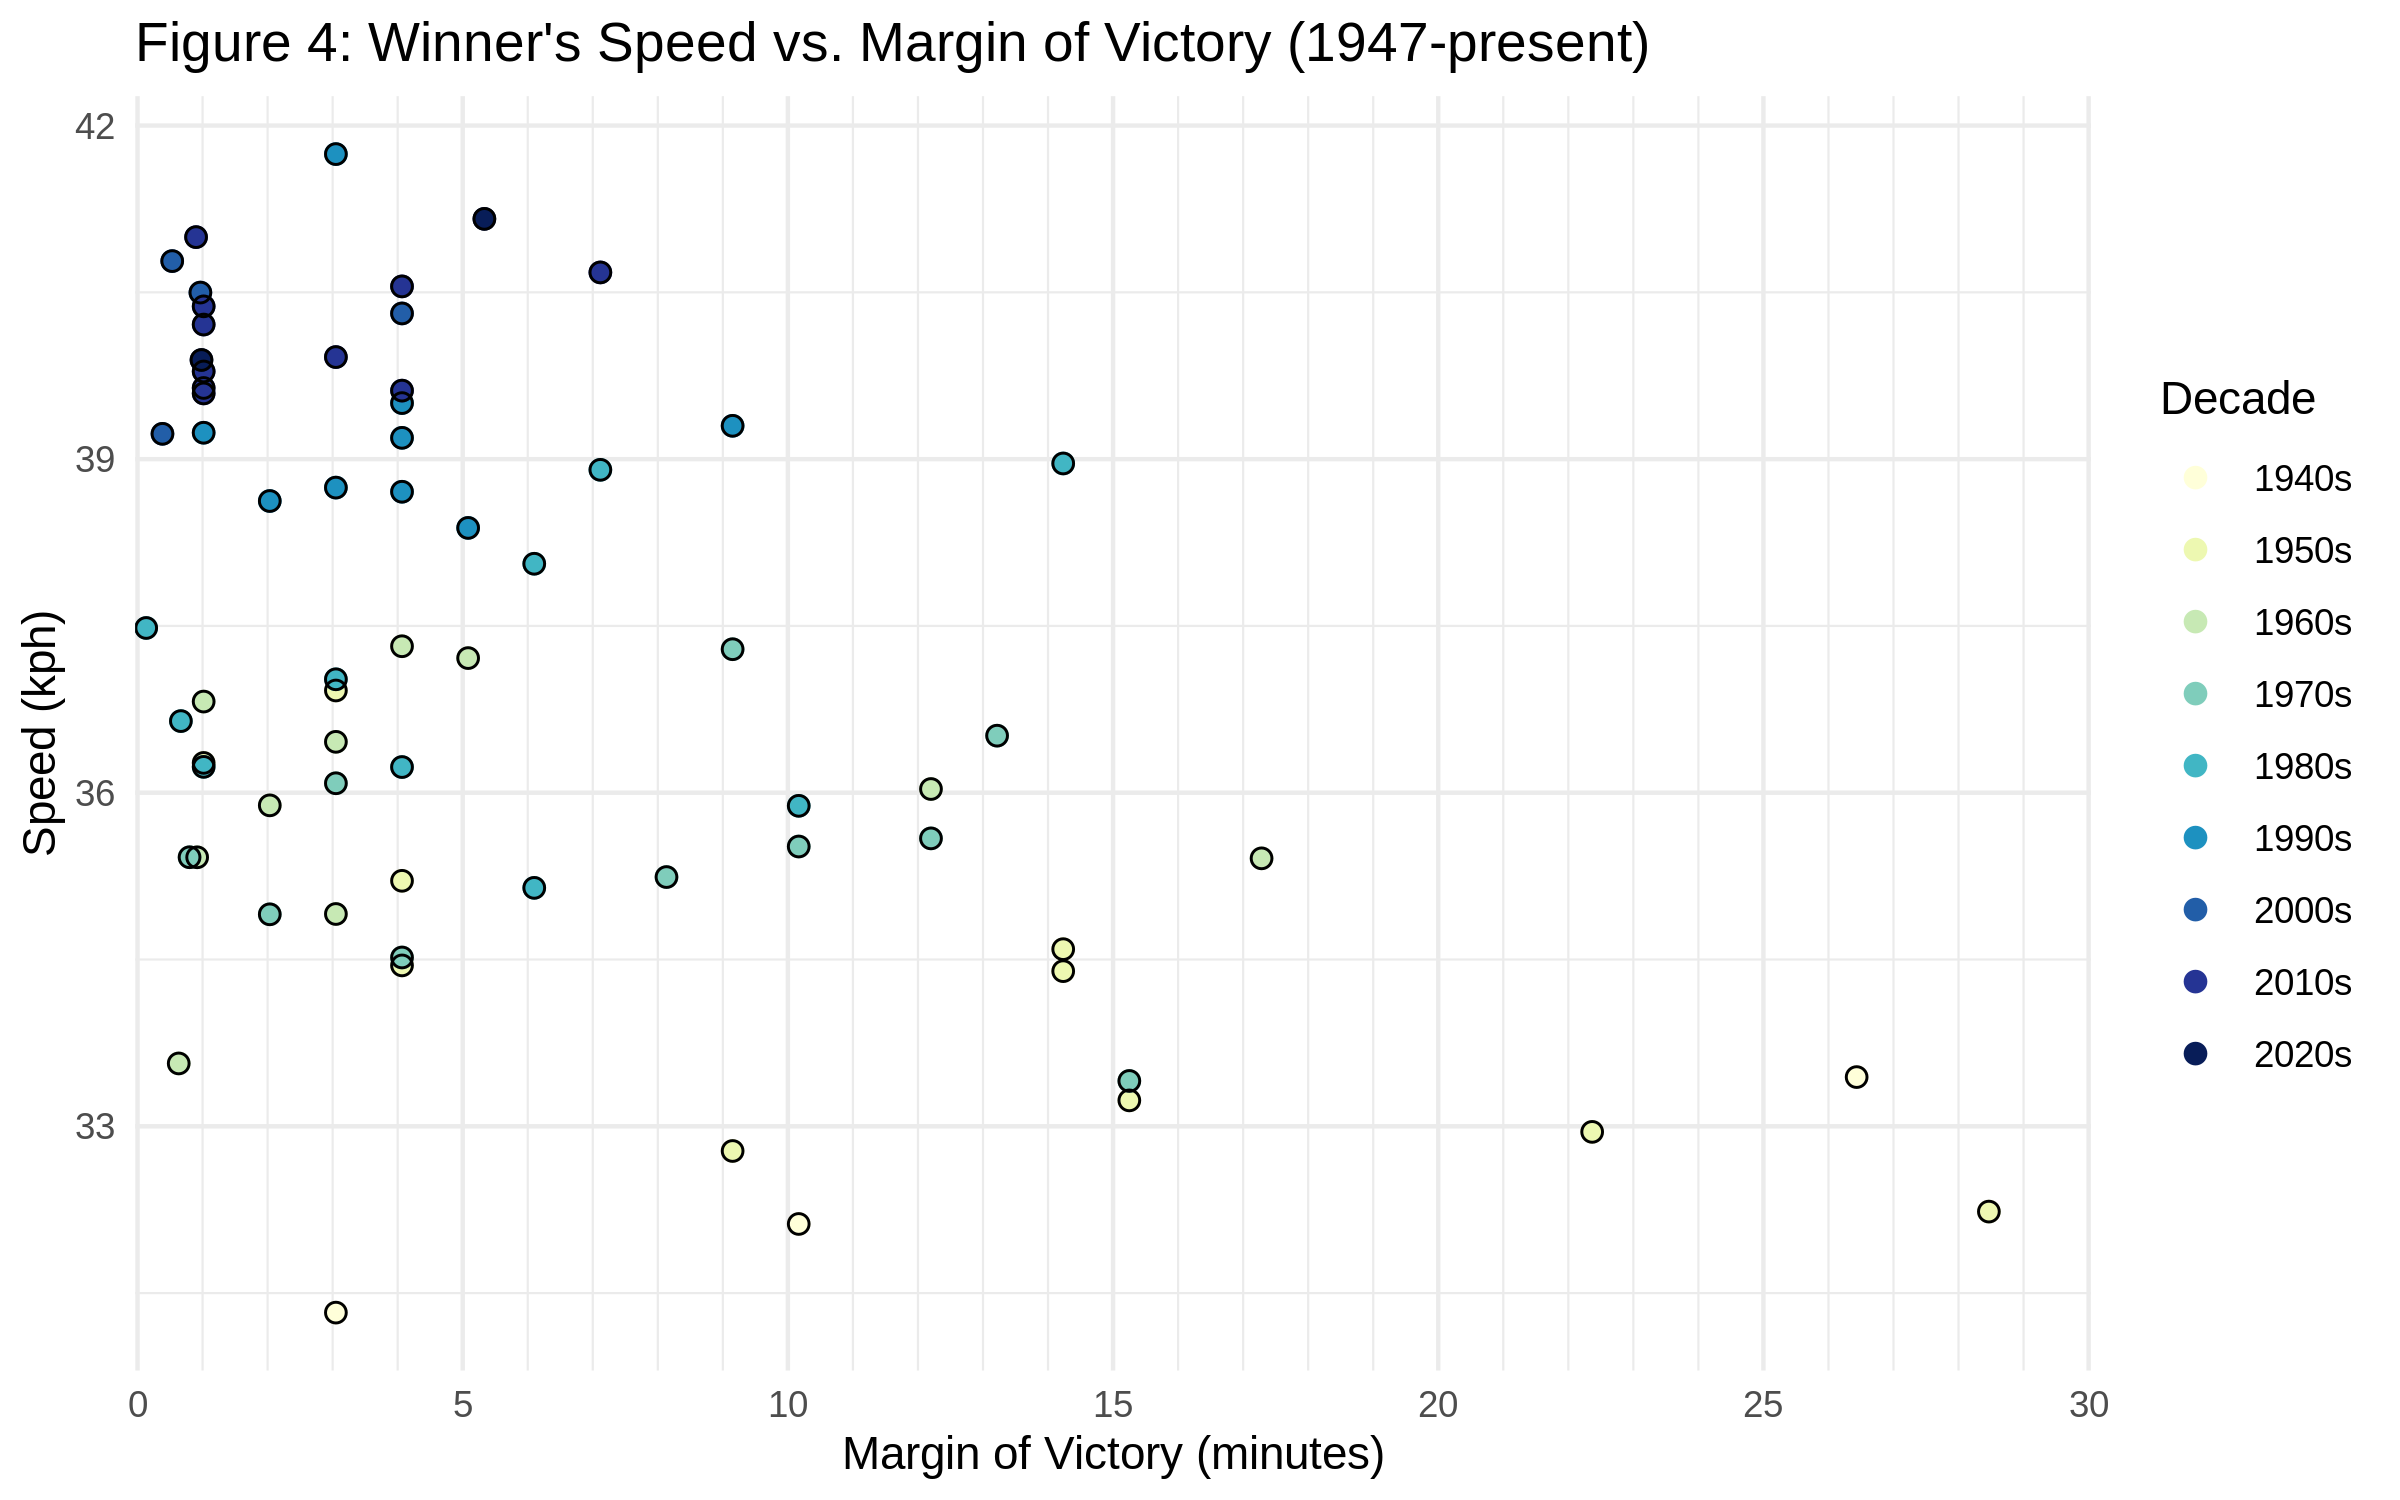

In [17]:
p3 = ggplot() +
    geom_point(data=tdf3 %>% filter(era=="Post-WWII"), 
               aes(x=time_margin_minutes, y=speed, color=decade),
               size=2) +
    geom_point(data=tdf3 %>% filter(era=="Post-WWII"), 
               aes(x=time_margin_minutes, y=speed),
               color="black",
               shape=1,
               size=2) +
    theme_minimal() +
    scale_color_brewer(palette="YlGnBu") +
    scale_x_continuous(breaks=c(0,5,10,15,20,25,30),minor_breaks = seq(0,30,1)) +
    coord_cartesian(xlim = c(1.33,28.67)) +
    labs(title="Figure 4: Winner's Speed vs. Margin of Victory (1947-present)",
         x="Margin of Victory (minutes)",
         y="Speed (kph)",
         color="Decade")
p3

## Conclusions

France and Belgium have had the most TDF winners (Fig. 1), although many of the champions from both those countries came before WWII, and neither country has had a TDF winner since 1985. The speed of TDF champions has increased over time (Fig. 2), with the fastest three rides being Marco Pantani's 1998 effort, Lance Armstrong's revoked 2005 victory, and Tadej Pogacar's win this year. However, this does not necessarily mean today's riders are better than those from past decades: the distance of the race has steadily decreased over time (Fig. 3), so it is possible that faster speeds simply result from competitors not having to ride as far. Riding faster does not seem to increase a champion's margin of victory; in fact, the fastest riders seem to win by fewer minutes (Fig. 4). This is likely mostly due to increased levels of competition over time – so many riders are good now that it seems nearly impossible for a rider to win by 10 minutes or more, as was common in past decades.